In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [5]:
df.shape

(183412, 16)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [7]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [12]:
df.start_station_name.unique()

array(['Montgomery St BART Station (Market St at 2nd St)',
       'The Embarcadero at Steuart St', 'Market St at Dolores St',
       'Grove St at Masonic Ave', 'Frank H Ogawa Plaza',
       '4th St at Mission Bay Blvd S', 'Palm St at Willow St',
       'Washington St at Kearny St', 'Post St at Kearny St',
       'Jones St at Post St',
       'Civic Center/UN Plaza BART Station (Market St at McAllister St)',
       'Valencia St at 21st St', 'Channing Way at Shattuck Ave',
       'Bancroft Way at College Ave', 'Howard St at Mary St',
       '22nd St at Dolores St', 'Laguna St at Hayes St',
       '5th St at Folsom', 'Telegraph Ave at 23rd St',
       'Page St at Scott St', 'Lake Merritt BART Station',
       'West St at 40th St', 'The Embarcadero at Sansome St',
       'Folsom St at 9th St', 'University Ave at Oxford St',
       'MLK Jr Way at University Ave', 'The Embarcadero at Bryant St',
       '17th St at Valencia St', 'Valencia St at 16th St',
       'Valencia St at 22nd St', 'Fran

## Wrangling step - assessing and cleaning.

### ASSESSMNET:

 - start_time as datetime or int
 - end_time as datetime or int
 - start_station_id as String object
 - end_station_id as String object
 - bike_id as string
 - member_birth_year as datetime or maybe int.
 
 #### Null value:
 
 
 - start_station_id
 - start_station_name 
 - member_birth_year 
 - member_gender

In [13]:
print(df.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [30]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [18]:
df.duplicated().sum()

0

### Cleaning

In [31]:
df.dropna(inplace=True)

In [35]:
df['bike_id'] = df['bike_id'].astype(str)
df.end_time = pd.to_datetime(df.end_time)
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.start_station_id = df.start_station_id.astype(str)
df.end_station_id = df.end_station_id.astype(str)
df.member_birth_year = df.member_birth_year.astype(int)

In [36]:
df.shape

(174952, 16)

In [37]:
# https://www.journaldev.com/23365/python-string-to-datetime-strptime 
# https://www.geeksforgeeks.org/python-pandas-series-dt-strftime/

df['trip_month'] = df.start_time.dt.strftime('%b')
df['trip_day'] = df.start_time.dt.strftime('%a')
df['trip_hour'] = df.start_time.dt.strftime('%H')

In [38]:
df['age'] = datetime.now().year - df.member_birth_year

In [39]:
df.drop(axis=1, columns=['start_time','end_time'], inplace=True)

In [41]:
df_clean = df.copy()
df_clean.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_month,trip_day,trip_hour,age
0,52185,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Feb,Thu,17,37
2,61854,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Feb,Thu,12,49
3,36490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,Feb,Thu,17,32
4,1585,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Feb,Thu,23,47
5,1793,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Feb,Thu,23,62


## Univariate Exploration

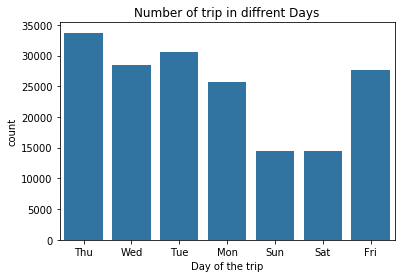

In [50]:
sb.countplot(data=df_clean, x='trip_day', color=sb.color_palette()[0]);
plt.xlabel('Day of the trip')
plt.title('Number of trip in diffrent Days');

#### weekdays has way more trips than the weekends, as expected.

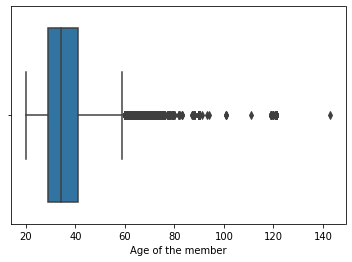

In [51]:
# I would consider the Outliers from maybe 95 yers and above.
sb.boxplot(data=df_clean, x='age', color=sb.color_palette()[0]);
plt.xlabel('Age of the member');

#### The Age distribution seem very normal, most points were between 28 to 43 years.

In [53]:
df_clean.age.describe()

count    174952.000000
mean         36.196865
std          10.118731
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: age, dtype: float64

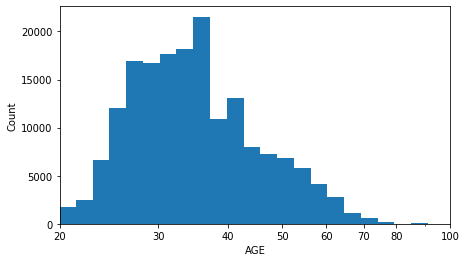

In [52]:
bins = 10 ** np.arange(1, 3.0 + 0.03 ,0.03) 
plt.figure(figsize=[7, 4])
plt.hist(data=df_clean, x='age', bins=bins)
ticks = [20, 30, 40 , 50, 60, 70, 80, 100]
labels = ['{}'.format(val) for val in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.xlim(20,100)
plt.show();

## Bivariate Exploration

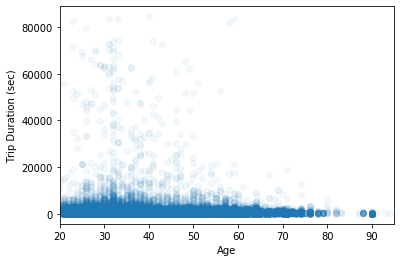

In [54]:
# a scatter plot.
plt.scatter(data=df_clean, x='age', y='duration_sec', alpha=1/20)
plt.xlim(20, 95) ## for better and focused result.
plt.xlabel('Age')
plt.ylabel('Trip Duration (sec)');

#### In comparing the Age with Trip Duration from the above figures, I have an inverse relationship between the two variable. duration trip decreases in general as age increses as excpected.

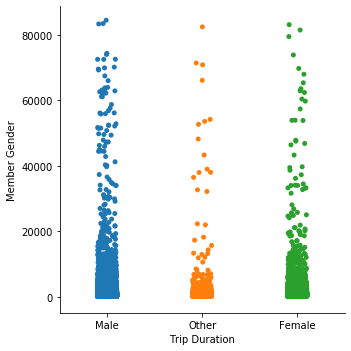

In [56]:
sb.catplot(x="member_gender", y="duration_sec", data=df_clean)
plt.xlabel('Trip Duration')
plt.ylabel('Member Gender');

#### Male seem to the higher trip duration, but this need to be investigated more. (propration)

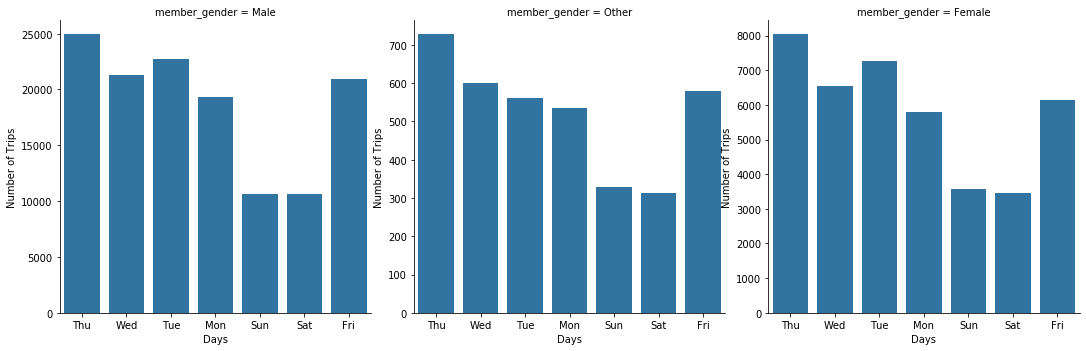

In [71]:
day_order = list(reversed(df_clean.trip_day.unique()))
g = sb.FacetGrid(data=df_clean,col='member_gender', col_wrap = 3, height = 5, sharey=False)
g.map(sb.countplot, 'trip_day')

for i in range(3):
    g.axes[i].set_xlabel('Days')
    g.axes[i].set_ylabel('Number of Trips')

plt.show();

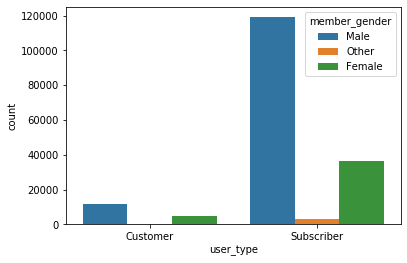

In [60]:
sb.countplot(data=df_clean, x='user_type', hue='member_gender')

#### User Type with member gender

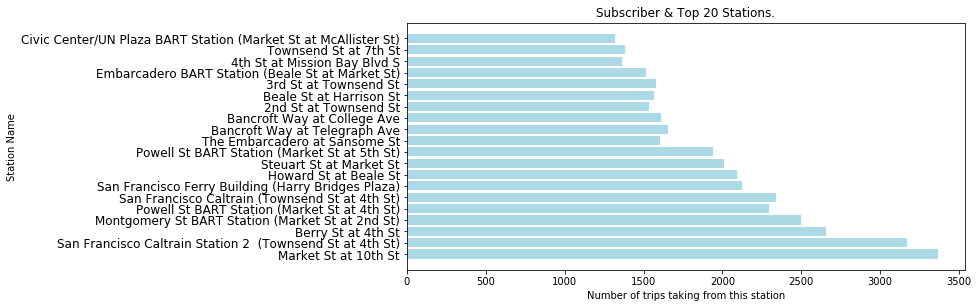

In [62]:
df_sub = df_clean.query('user_type == "Subscriber"').start_station_name.value_counts()
df_cus = df_clean.query('user_type == "Customer"').start_station_name.value_counts()

freq_station = df_clean.start_station_name.value_counts()
y = freq_station.values[0:20] 
x = freq_station.index[0:20] 
x_sub = df_sub.index[0:20] 
y_sub = df_sub.values[0:20] 

x_cus = df_cus.index[0:20] 
y_cus = df_cus.values[0:20] 

plt.figure(figsize = [10, 10]) # larger figure size for subplots

plt.subplot(2,1,1)
plt.barh(x,df_sub[x],color='lightblue')
plt.yticks(fontsize=12)
plt.title('Subscriber & Top 20 Stations.')
plt.xlabel('Number of trips taking from this station')
plt.ylabel('Station Name');

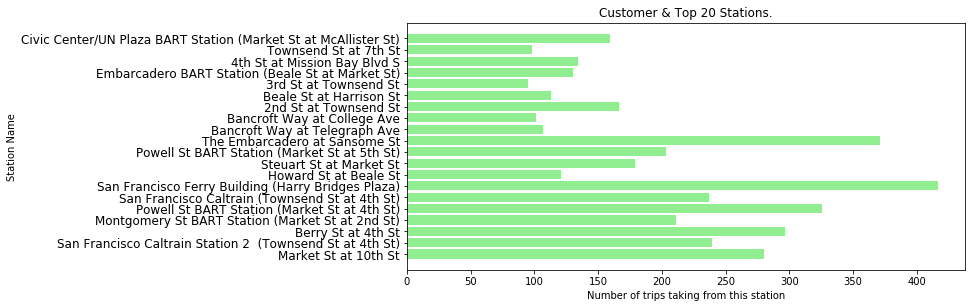

In [63]:
plt.figure(figsize = [10, 10]) # larger figure size for subplots
plt.subplot(2, 1, 2)
plt.barh(x,df_cus[x],color='lightgreen')
plt.yticks(fontsize=12)
plt.title('Customer & Top 20 Stations.')
plt.xlabel('Number of trips taking from this station')
plt.ylabel('Station Name');

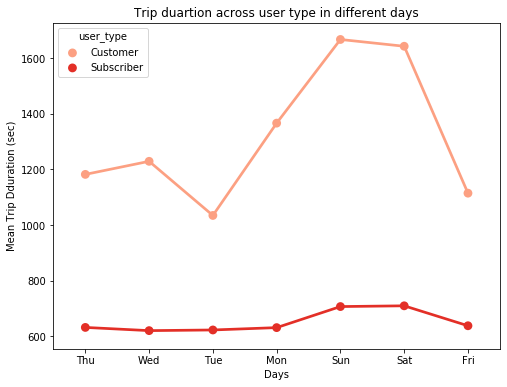

In [66]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'trip_day', y = 'duration_sec', hue = 'user_type', palette = 'Reds', ci=None)
plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Days')
plt.show();

#### Trip duartion across user type in different months.

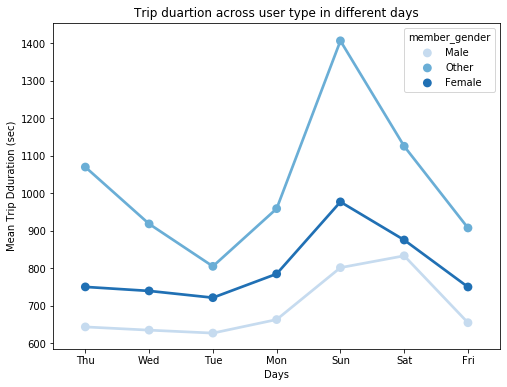

In [67]:
fig = plt.figure(figsize = [8,6])
sb.pointplot(data = df_clean, x = 'trip_day', y = 'duration_sec', hue = 'member_gender', palette = 'Blues', ci=None)
plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Days')
plt.show();

#### Trib duration of each day for member gender.Females in general tend to have much longer trips.

Text(0.5, 21.706249999999983, 'Hour of the trip')

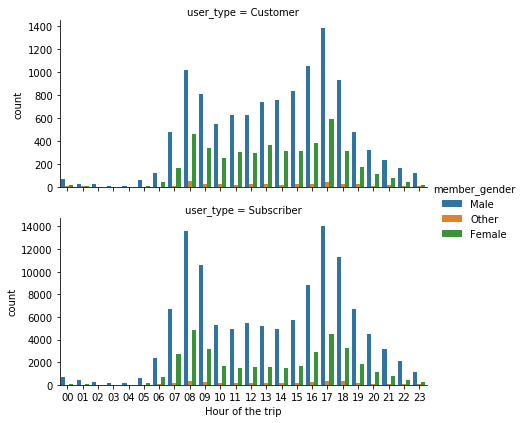

In [68]:
sb.catplot(data=df_clean,x='trip_hour',col='user_type', 
           hue='member_gender', col_wrap = 1, 
           height = 3, aspect=2, 
           sharey=False, kind='count')
plt.xlabel('Hour of the trip')

#### Trip duartion across user type in different hours in the day.

In [70]:
df_clean.to_csv('df_clean.csv', index=False)